<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Diabetes_prediction_using_logistic_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('DB_diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          519 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            518 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      518 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        518 non-null    object
 11  delayed healing     519 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    519 non-null    object
 14  Alopecia            519 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
df.corr()

,Age
Age,1.0


In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,NaN,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


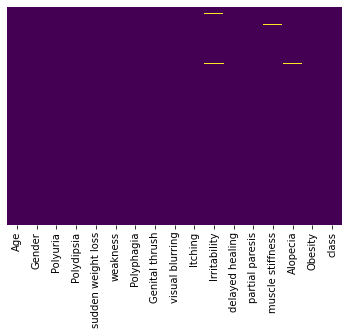

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


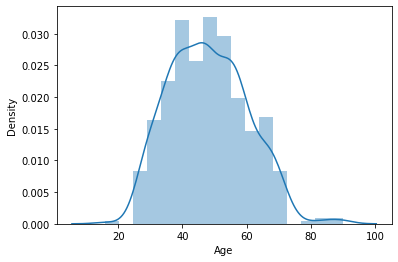

In [10]:
sns.distplot(df['Age'].dropna(),kde=True)

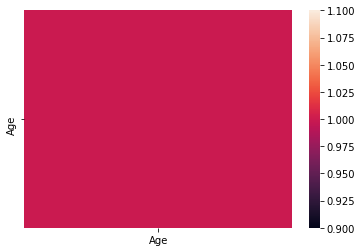

In [11]:
sns.heatmap(df.corr())

In [28]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Polyuria'] = label_encoder.fit_transform(df['Polyuria'])
df['Polydipsia'] = label_encoder.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = label_encoder.fit_transform(df['sudden weight loss'])
df['weakness'] = label_encoder.fit_transform(df['weakness'])
df['Polyphagia'] = label_encoder.fit_transform(df['Polyphagia'])
df['Genital thrush'] = label_encoder.fit_transform(df['Genital thrush'])
df['visual blurring'] = label_encoder.fit_transform(df['visual blurring'])
df['Itching'] = label_encoder.fit_transform(df['Itching'])
df['Irritability'] = label_encoder.fit_transform(df['Irritability'])
df['delayed healing'] = label_encoder.fit_transform(df['delayed healing'])
df['partial paresis'] = label_encoder.fit_transform(df['partial paresis'])
df['muscle stiffness'] = label_encoder.fit_transform(df['muscle stiffness'])
df['Alopecia'] = label_encoder.fit_transform(df['Alopecia'])
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])
df['class'] = label_encoder.fit_transform(df['class'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [35]:
from sklearn.linear_model import LogisticRegression

df = df.dropna()
x = df.drop('class',axis=1)
y = df['class']

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.91      0.93      0.92        91

    accuracy                           0.91       154
   macro avg       0.91      0.90      0.91       154
weighted avg       0.91      0.91      0.91       154



In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[55,  8],
       [ 6, 85]])